In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import datetime

# Data Exploration

Let's start by importing the data:

In [2]:
data = pd.read_csv("../data/eurlex/combined.csv", sep=",", quotechar="'")
data = data.astype({
    'form': 'category'
})

data['date'        ] = pd.to_datetime(data['date'        ])
data['oj_date'     ] = pd.to_datetime(data['oj_date'     ])
data['of_effect'   ] = pd.to_datetime(data['of_effect'   ])
data['end_validity'] = pd.to_datetime(data['end_validity'])

## Basic statistics

Number of documents:

In [3]:
len(data)

126472

Number of missing elements:

In [4]:
total = data.isnull().sum()
percent = data.isnull().sum()/data.isnull().count()*100.0
missing_data = pd.concat([total, percent], axis=1, keys=['Count', 'Percent'])
print(missing_data)

                     Count    Percent
celex                    0   0.000000
form                     0   0.000000
date                  1990   1.573471
title                    2   0.001581
oj_date               2929   2.315928
of_effect            19308  15.266620
end_validity         31480  24.890885
addressee            99080  78.341451
subject_matter       29250  23.127649
directory_codes      37753  29.850876
eurovoc_descriptors  33586  26.556076
legal_basis           9412   7.441963
relationships         1089   0.861060
text                     0   0.000000


### form

In [5]:
data['form'].describe()

count        126472
unique            1
top       Agreement
freq         126472
Name: form, dtype: object

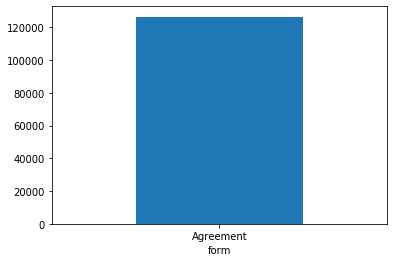

In [6]:
data.groupby('form').size().plot(kind='bar', rot=0)

### date

In [7]:
data['date'].describe(datetime_is_numeric=True)

count                           124482
mean     1995-03-20 02:01:34.047332096
min                1949-09-24 00:00:00
25%                1986-06-23 00:00:00
50%                1997-03-10 00:00:00
75%                2004-04-21 00:00:00
max                2013-10-04 00:00:00
Name: date, dtype: object

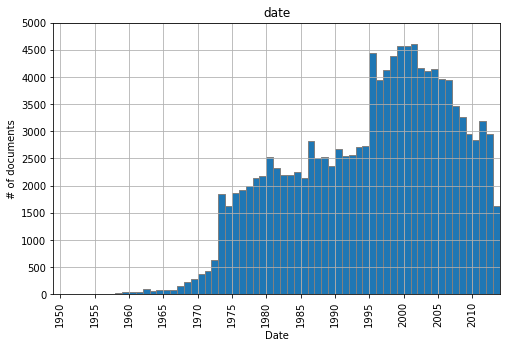

In [8]:
ax = data['date'].hist(bins=65, edgecolor='grey', range=(datetime.date(1949, 1, 1), datetime.date(2014, 1, 1)), figsize=(8,5))
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xlim([datetime.date(1949, 1, 1), datetime.date(2014, 1, 1)])
ax.set_ylim([0, 5000])
plt.title('date')
plt.xlabel('Date')
plt.ylabel('# of documents')
plt.xticks(rotation=90)
plt.yticks(range(0, 5001, 500));

### title

In [9]:
data['title'].str.len().describe()

count    126470.000000
mean        210.570001
std          79.375457
min           6.000000
25%         157.000000
50%         199.000000
75%         250.000000
max        1531.000000
Name: title, dtype: float64

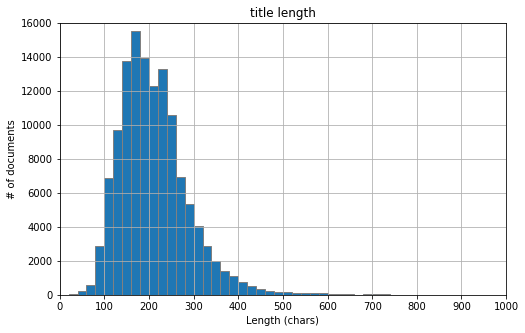

In [10]:
ax = data['title'].str.len().hist(bins=50, edgecolor='grey', range=(0, 1000), figsize=(8,5))
ax.set_xlim([0, 1000])
ax.set_ylim([0, 16000])
plt.title('title length')
plt.xlabel('Length (chars)')
plt.ylabel('# of documents')
plt.xticks(range(0, 1001, 100));

### oj_date

In [11]:
data['oj_date'].describe(datetime_is_numeric=True)

count                        123543
mean     1995-03-01 20:52:19.739200
min             1952-12-30 00:00:00
25%             1986-06-21 00:00:00
50%             1997-01-25 00:00:00
75%             2004-02-27 00:00:00
max             2013-10-22 00:00:00
Name: oj_date, dtype: object

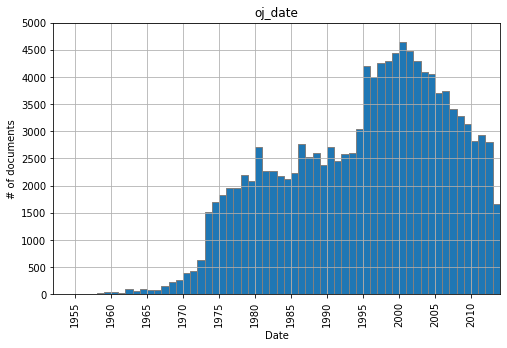

In [12]:
ax = data['oj_date'].hist(bins=62, edgecolor='grey', range=(datetime.date(1952, 1, 1), datetime.date(2014, 1, 1)), figsize=(8,5))
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xlim([datetime.date(1952, 1, 1), datetime.date(2014, 1, 1)])
ax.set_ylim([0, 5000])
plt.title('oj_date')
plt.xlabel('Date')
plt.ylabel('# of documents')
plt.xticks(rotation=90)
plt.yticks(range(0, 5001, 500));

### of_effect

In [13]:
data['of_effect'].describe(datetime_is_numeric=True)

count                           107164
mean     1995-09-21 11:55:19.428166272
min                1953-01-01 00:00:00
25%                1987-10-01 00:00:00
50%                1997-06-24 00:00:00
75%                2004-05-07 00:00:00
max                2017-01-01 00:00:00
Name: of_effect, dtype: object

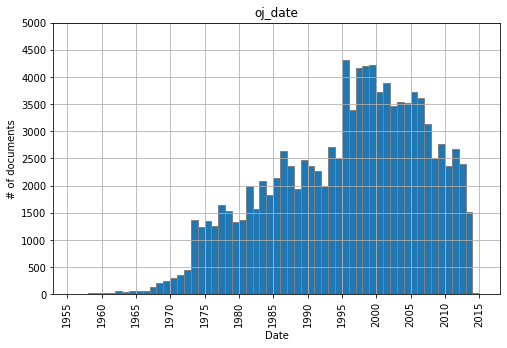

In [14]:
ax = data['of_effect'].hist(bins=65, edgecolor='grey', range=(datetime.date(1953, 1, 1), datetime.date(2018, 1, 1)), figsize=(8,5))
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xlim([datetime.date(1953, 1, 1), datetime.date(2018, 1, 1)])
ax.set_ylim([0, 5000])
plt.title('oj_date')
plt.xlabel('Date')
plt.ylabel('# of documents')
plt.xticks(rotation=90)
plt.yticks(range(0, 5001, 500));

### end_validity

In [15]:
valid_end_validity = data[data['end_validity'] != pd.to_datetime("2100-01-01")]['end_validity']
valid_end_validity.describe(datetime_is_numeric=True)

count                            59600
mean     1992-03-03 09:24:08.214765056
min                1954-01-07 00:00:00
25%                1982-12-31 00:00:00
50%                1991-11-30 00:00:00
75%                2000-02-29 00:00:00
max                2058-12-31 00:00:00
Name: end_validity, dtype: object

In [16]:
invalid_end_validity = data[data['end_validity'] == pd.to_datetime("2100-01-01")]['end_validity']
invalid_end_validity.count()

35392

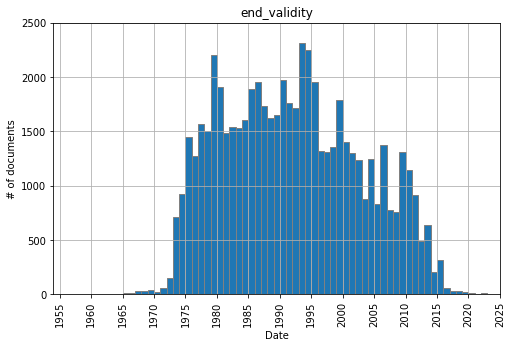

In [17]:
ax = valid_end_validity.hist(bins=104, edgecolor='grey', range=(datetime.date(1954, 1, 1), datetime.date(2058, 1, 1)), figsize=(8,5))
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xlim([datetime.date(1954, 1, 1), datetime.date(2025, 1, 1)])
ax.set_ylim([0, 2500])
plt.title('end_validity')
plt.xlabel('Date')
plt.ylabel('# of documents')
plt.xticks(rotation=90)
plt.yticks(range(0, 2501, 500));

### addressee

In [18]:
data['addressee'].str.len().describe()

count    27392.000000
mean        26.002884
std         27.599444
min          5.000000
25%         14.000000
50%         17.000000
75%         27.000000
max        255.000000
Name: addressee, dtype: float64

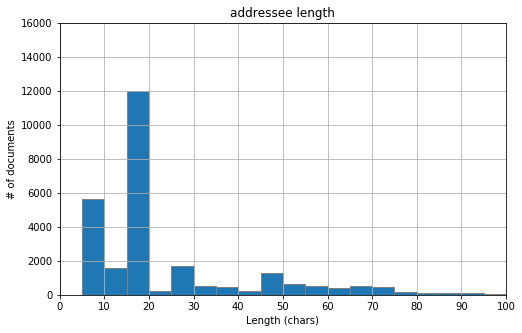

In [19]:
ax = data['addressee'].str.len().hist(bins=30, edgecolor='grey', range=(0, 150), figsize=(8,5))
ax.set_xlim([0, 100])
ax.set_ylim([0, 16000])
plt.title('addressee length')
plt.xlabel('Length (chars)')
plt.ylabel('# of documents')
plt.xticks(range(0, 101, 10));

## subject_matter

In [20]:
data['subject_matter'].describe()

count                                                 97222
unique                                                 6043
top       Competition;Rules applying to undertakings - c...
freq                                                   4993
Name: subject_matter, dtype: object

In [21]:
# Group in a single list all keywords
keywords = []
for element in data['subject_matter']:
    if (type(element) == float):
        keywords.append('NaN')
    else:
        for sub_element in element.split(";"): # keywords related to a single entry are separated by ";"
            keywords.append(sub_element)
        
print("Total Keywords: {}".format(len(keywords)))

Total Keywords: 227467


In [22]:
# Get unique keywords and respective frequency
unique_keywords, count = np.unique(keywords,return_counts=True)
count_sort_ind = np.argsort(-count)

print("Unique Keywords: {}".format(len(unique_keywords)))
print("(Excluding NaN) Most frequently used keyword: {} | {} times".format(unique_keywords[count_sort_ind][1], count[count_sort_ind][1]))

Unique Keywords: 251
(Excluding NaN) Most frequently used keyword: common commercial policy | 14334 times


In [23]:
lower_bound = 1 # starting at 1 to skip NaN (because NaN is the most common)
upper_bound = 25

In [24]:
sub_unique_keywords = unique_keywords[count_sort_ind][lower_bound:upper_bound]

In [25]:
sub_count = count[count_sort_ind][lower_bound:upper_bound]

In [26]:
subject_matter_df = pd.DataFrame({'Keywords' : sub_unique_keywords, 'Frequency' : sub_count})
print(subject_matter_df)

                                             Keywords  Frequency
0                            common commercial policy      14334
1                                  External relations      11671
2                                         Agriculture      10573
3                                         Competition       7111
4                                    Fisheries policy       5864
5                              Veterinary legislation       5720
6     Rules applying to undertakings - concentrations       5013
7                                    CCT: derogations       4846
8                               Approximation of laws       4842
9                                       Milk products       4435
10                                            Cereals       4022
11                                    Internal market       3864
12                                           Food aid       3540
13                                        Association       3472
14  European Agricultural

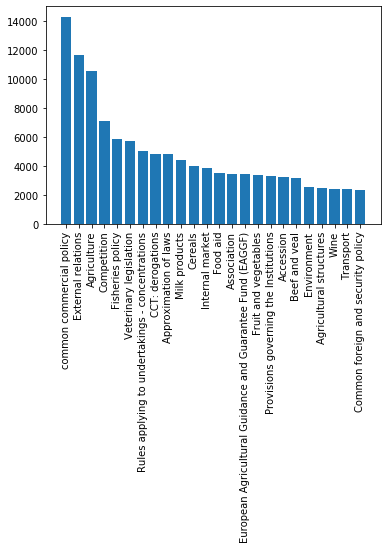

In [27]:
ticks = range(len(sub_count))
plt.bar(ticks, sub_count, align='center')
plt.xticks(ticks, sub_unique_keywords, rotation='vertical')
plt.show()

### eurovoc_descriptors

In [28]:
data['eurovoc_descriptors'].describe()

count                                                 92886
unique                                                55410
top       agri-monetary policy;citrus fruit;fruit vegeta...
freq                                                    683
Name: eurovoc_descriptors, dtype: object

In [29]:
# Group in a single list all keywords
eurovoc_descriptors = []
NaN_counter = 0
for element in data['eurovoc_descriptors']:
    if (type(element) == float):
        NaN_counter += 1
        eurovoc_descriptors.append('NaN')
    else:
        for sub_element in element.split(";"): # keywords related to a single entry are separated by ";"
            eurovoc_descriptors.append(sub_element)
        
print("Total eurovoc descriptors: {}".format(len(eurovoc_descriptors)))
print("Total NaN values: {}".format(NaN_counter))

Total eurovoc descriptors: 518377
Total NaN values: 33586


In [30]:
# Get unique keywords and respective frequency
unique_eurovoc_descriptors, eurovoc_descriptors_count = np.unique(eurovoc_descriptors,return_counts=True)
eurovoc_descriptors_count_sort_ind = np.argsort(-eurovoc_descriptors_count)

print("Unique eurovoc descriptors: {}".format(len(unique_eurovoc_descriptors)))
print("(Excluding NaN) Most frequently used eurovoc descriptor: {} | {} times".format(unique_eurovoc_descriptors[eurovoc_descriptors_count_sort_ind][1], eurovoc_descriptors_count[eurovoc_descriptors_count_sort_ind][1]))

Unique eurovoc descriptors: 5227
(Excluding NaN) Most frequently used eurovoc descriptor: export refund | 9007 times


In [31]:
lower_bound_ = 1
upper_bound_ = 25

In [32]:
sub_unique_eurovoc_descriptors = unique_eurovoc_descriptors[eurovoc_descriptors_count_sort_ind][lower_bound_:upper_bound_]

In [33]:
sub_eurovoc_descriptors_count = eurovoc_descriptors_count[eurovoc_descriptors_count_sort_ind][lower_bound_:upper_bound_]

In [34]:
eurovoc_descriptors_df = pd.DataFrame({'Eurovoc Descriptors' : sub_unique_eurovoc_descriptors, 'Frequency' : sub_eurovoc_descriptors_count})
print(eurovoc_descriptors_df)

         Eurovoc Descriptors  Frequency
0              export refund       9007
1                     import       7635
2          award of contract       6778
3               import price       5006
4            fruit vegetable       4974
5               citrus fruit       4918
6              third country       4538
7                  pip fruit       4428
8        originating product       4145
9               tariff quota       3854
10            import licence       3802
11                CCT duties       3680
12                      rice       3375
13                   cereals       3239
14              EC agreement       3197
15               white sugar       2715
16      agri-monetary policy       2639
17            health control       2600
18                     Spain       2370
19                      beef       2346
20            export licence       2201
21  quantitative restriction       2135
22             Community aid       2011
23               stone fruit       2008


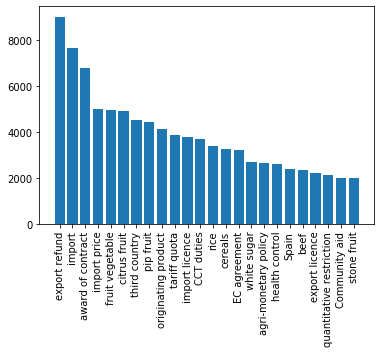

In [35]:
ticks_ = range(len(sub_eurovoc_descriptors_count))
plt.bar(ticks_, sub_eurovoc_descriptors_count, align='center')
plt.xticks(ticks, sub_unique_eurovoc_descriptors, rotation='vertical')
plt.show()